# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
noduplicate_mouse = mouse_metadata.drop_duplicates('Mouse ID', keep='last', inplace=False)
noduplicate_results = study_results.drop_duplicates('Mouse ID', keep='last', inplace=False)

In [25]:
# Combine the data into a single dataset
new = pd.merge(noduplicate_mouse, noduplicate_results, on="Mouse ID", how="inner")
merge_data = new[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)']]
# Display the data table for preview
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,45,22.050126,1,Ramicane,Male,21,16
1,s185,45,23.343598,1,Capomulin,Female,3,17
2,x401,45,28.484033,0,Capomulin,Female,16,15
3,m601,45,28.430964,1,Capomulin,Male,22,17
4,g791,45,29.128472,1,Ramicane,Male,11,16


In [26]:
# Checking the number of mice.
merge_data['Mouse ID'].count()

249

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_results = study_results[study_results.duplicated(keep=False)]
duplicate_results['Mouse ID'].unique()

array(['g989'], dtype=object)

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.0,0
137,g989,0,45.0,0


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data = merge_data.drop(107)
new_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,45,22.050126,1,Ramicane,Male,21,16
1,s185,45,23.343598,1,Capomulin,Female,3,17
2,x401,45,28.484033,0,Capomulin,Female,16,15
3,m601,45,28.430964,1,Capomulin,Male,22,17
4,g791,45,29.128472,1,Ramicane,Male,11,16


In [30]:
# Checking the number of mice in the clean DataFrame.
new_data['Mouse ID'].count()

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [32]:
regimen = new_data.groupby('Drug Regimen')
tumor_summary = pd.DataFrame({'Mean Tumor Volume':regimen['Tumor Volume (mm3)'].mean(),
                             'Median Tumor Volume':regimen['Tumor Volume (mm3)'].median(),
                             'Tumor Volume Variance':regimen['Tumor Volume (mm3)'].var(),
                             'Tumor Volume Std. Dev.':regimen['Tumor Volume (mm3)'].std(),
                             'Tumor Volume Std. Err.':regimen['Tumor Volume (mm3)'].sem()})
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [54]:
regimen[['Tumor Volume (mm3)']].aggregate(['mean','median','var','std','sem'])

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.493884  55.591622   70.822755   8.415626  1.717832
Ramicane              36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

## Bar and Pie Charts

(0.0, 30.0)

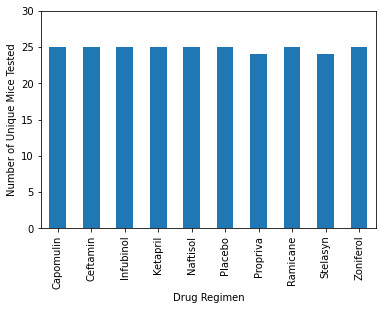

In [35]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = regimen['Mouse ID'].count()
regimen_count.plot(kind="bar")
plt.ylabel("Number of Unique Mice Tested")
plt.ylim(0,30)

<function matplotlib.pyplot.show(close=None, block=None)>

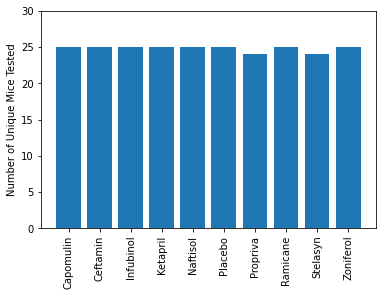

In [36]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
regimen_list = regimen_count.index.to_list()
plt.bar(regimen_list,regimen_count)
plt.ylabel("Number of Unique Mice Tested")
plt.ylim(0,30)
plt.xticks(rotation = 'vertical')
plt.show

Text(0, 0.5, 'Sex')

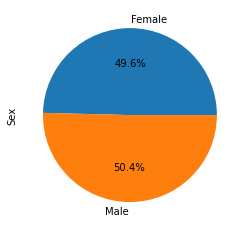

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_grouped = new_data.groupby('Sex')
sex_count = sex_grouped['Mouse ID'].count()
sex_count.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('Sex')

Text(0, 0.5, 'Sex')

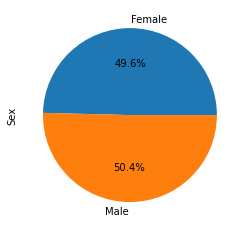

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=['Female','Male'], autopct='%1.1f%%')
plt.ylabel("Sex")

# Quartiles, Outliers and Boxplots

In [149]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_mouse_grouped = new_data.groupby("Drug Regimen")
regimen_mouse_grouped = regimen_mouse_grouped.last()
# Start by getting the last (greatest) timepoint for each mouse
best_regis = [b for b in treatment_list]
best_regimens = regimen_mouse_grouped['Tumor Volume (mm3)'][best_regis]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
best_output = pd.DataFrame(best_regimens)
best_output.loc[("Capomulin"),['Tumor Volume (mm3)']]

Tumor Volume (mm3)    46.539206
Name: Capomulin, dtype: float64

In [173]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    new_output = best_output.loc[(drug),['Tumor Volume (mm3)']]
    tumor_vol_list.append(new_output)
    pd.DataFrame(tumor_vol_list)
    
    quartiles = new_output.quantile([.25,.5,.75])
#     print(quartiles)
    lowerq = quartiles[0.25]
#     print(lowerq)
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
#     print(iqr)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    
    print(f"The IQR for regimen at 'Best Regimen' List Item {drug} is {iqr}'.")
    if (lower_bound < new_output.min()) & (upper_bound > new_output.max()):
        print(f"\tThere are no outliers at 'Best Regimen' List Item {drug}'.")
    else:
        print(f"\tThere is at least 1 outlier at 'Best Regimen' List Item {drug}'.")    

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
  
    # Determine outliers using upper and lower bounds


The IQR for regimen at 'Best Regimen' List Item Capomulin is 0.0'.
	There is at least 1 outlier at 'Best Regimen' List Item Capomulin'.
The IQR for regimen at 'Best Regimen' List Item Ramicane is 0.0'.
	There is at least 1 outlier at 'Best Regimen' List Item Ramicane'.
The IQR for regimen at 'Best Regimen' List Item Infubinol is 0.0'.
	There is at least 1 outlier at 'Best Regimen' List Item Infubinol'.
The IQR for regimen at 'Best Regimen' List Item Ceftamin is 0.0'.
	There is at least 1 outlier at 'Best Regimen' List Item Ceftamin'.


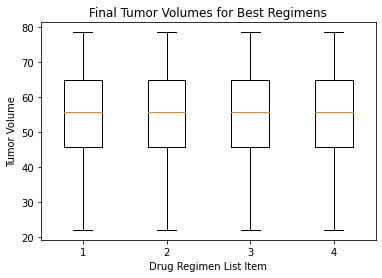

In [74]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for Best Regimens')
ax1.set_xlabel('Drug Regimen List Item')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_vol_list)
plt.show()

## Line and Scatter Plots

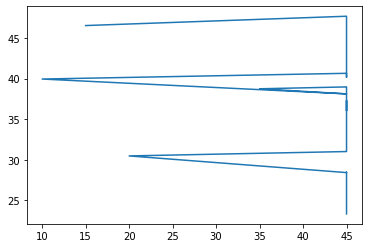

In [85]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data = new_data.loc[new_data['Drug Regimen']=='Capomulin']
plt.plot(Capomulin_data['Timepoint'],Capomulin_data['Tumor Volume (mm3)'])


In [77]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

In [78]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen